In [1]:
#
# Create a classifier for digits '1' and '0'
# 
# TRANSFER LEARNING Inception V3
# with DATA AUGMENTATION and DROPOUT
# Shift the digit '1' to the left and to the right 
# Evaluate the model with shifted images
# Conclusion
# Author: Luis A. Mateos

# pip install tensorflow-datasets
# pip install tensorflow --upgrade
# pip install scipy

import os
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

path_base = os.getcwd()
#'\home\\github\ml-classifier-no-common-sense\\'
path_dir = os.path.join(path_base+'/ml101/')
train_zero_dir = os.path.join(path_base+'/ml101/0/')
train_one_dir = os.path.join(path_base+'/ml101/1/')

# print directories with training images
print(train_zero_dir)
print(train_one_dir)

# print filename from each directory
train_zero_names = os.listdir(train_zero_dir)
print(train_zero_names[0])
train_one_names = os.listdir(train_one_dir)
print(train_one_names[0])

# print total training images
print("Total training zero images= ", len(os.listdir(train_zero_dir)))
print("Total training one images= ", len(os.listdir(train_one_dir)))

/home/watson/gittemp/ml-classifier-no-common-sense/ml101/0/
/home/watson/gittemp/ml-classifier-no-common-sense/ml101/1/
img_28894.jpg
img_36495.jpg
Total training zero images=  4132
Total training one images=  4684


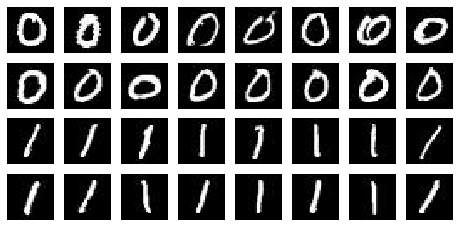

In [2]:
#
# Visualize some of the training images
#
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg   

nrows, ncols = 8,8
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*1, nrows*1)

pic_index += 16
next_zero_pix = [os.path.join(train_zero_dir, fname)
                for fname in train_zero_names[pic_index-16:pic_index]]
next_one_pix = [os.path.join(train_one_dir, fname)
                for fname in train_one_names[pic_index-16:pic_index]]

for i, img_path in enumerate(next_zero_pix + next_one_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    
    img = mpimg.imread(img_path)
    #R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    #imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
    #plt.imshow(imgGray, cmap='gray')
    
    plt.imshow(img, cmap='gray')
    
plt.show()

In [3]:
#
# Transfer learning
#
import tensorflow as tf
print(tf.__version__)

import urllib.request

from tensorflow.keras.applications.inception_v3 import InceptionV3

weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                               include_top=False,
                               weights=None)

pre_trained_model.load_weights(weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False
    
pre_trained_model.summary()

2.9.1
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                 

 batch_normalization_10 (BatchN  (None, 16, 16, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 16, 16, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 16, 16, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 16, 16, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 7, 7, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 7, 7, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 7, 7, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 7, 7, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 7, 7, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 7, 7, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 7, 7, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 7, 7, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 3, 3, 320)    552960      ['activation_70[0][0]']          
          

                                                                                                  
 activation_82 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 3, 3, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 3, 3, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activatio

In [4]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [5]:
#
# TRANSFER LEARNING
#

x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(pre_trained_model.input, x)

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy']
             )

In [6]:
# DATA AUGMENTATION withOUT NORMALIZATION 
#We use this visualizer for displaying the data augmentation only
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_visualizer = ImageDataGenerator(
      #rescale=1./255,
      rotation_range=33,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator_visualizer = train_datagen_visualizer.flow_from_directory(path_base+'/ml101/',
                                                    target_size=(150,150),#(28,28),
                                                    batch_size=64,
                                                    class_mode='binary')
#class_mode='categorical')

Found 8816 images belonging to 2 classes.


<class 'tuple'>
<class 'numpy.ndarray'>
(64, 150, 150, 3)


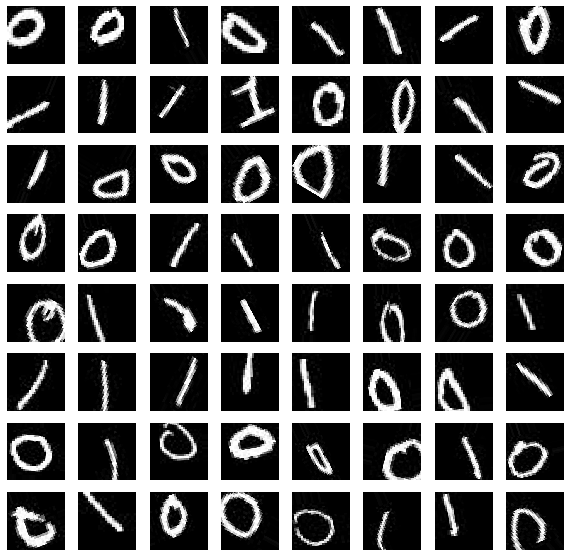

In [7]:
import matplotlib.pyplot as plt
import numpy as np

#plt.figure(figsize=(10, 10))
for image in train_generator_visualizer:
    print(type(image))
    print(type(image[0]))
    print(image[0].shape)
#    plt.imshow(image[0].astype("uint8"))
    break
    
plt.figure(figsize=(10, 10))
for images, labels in train_generator_visualizer:#.take(1):
    for i in range(64):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(images[i].astype("uint8"))
        plt.axis("off")
    break

In [8]:
# Re RUN DATA AUGMENTATION with NORMALIZATION 
#(IF displaying the images will look all black from values between 0 to 1)

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=33,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(path_base+'/ml101/',
                                                    target_size=(150,150),#(28,28),
                                                    batch_size=64,
                                                    class_mode='binary')

Found 8816 images belonging to 2 classes.


In [9]:
history = model.fit(train_generator,
                   steps_per_epoch=8,
                   epochs=5,
                   verbose=2)

Epoch 1/5
8/8 - 9s - loss: 0.6907 - accuracy: 0.8184 - 9s/epoch - 1s/step
Epoch 2/5
8/8 - 7s - loss: 0.0649 - accuracy: 0.9785 - 7s/epoch - 841ms/step
Epoch 3/5
8/8 - 7s - loss: 0.0822 - accuracy: 0.9844 - 7s/epoch - 872ms/step
Epoch 4/5
8/8 - 7s - loss: 0.0154 - accuracy: 0.9941 - 7s/epoch - 891ms/step
Epoch 5/5
8/8 - 7s - loss: 0.0147 - accuracy: 0.9941 - 7s/epoch - 906ms/step


In [10]:
#
# Helper functions for plotting
#
import numpy as np
import os
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing import image

x_images=[]

def common(path_directory,path_split,expected=1):
    paths = []
    path = path_directory#train_one_dir#path_base+'imnist/1/'

    # setting the pahts to look for the images
    one_names = os.listdir(path)

    # show some images from '0'
    nrows, ncols = 8,8
    pic_index = 0

    fig = plt.gcf()
    fig.set_size_inches(ncols*1, nrows*1)

    pic_index += 16
    next_one__pix = [os.path.join(path, fname)
                    for fname in one_names[pic_index-16:pic_index]]

    for i, img_path in enumerate(next_one__pix):
        sp = plt.subplot(nrows, ncols, i+1)
        sp.axis('off')

        img = mpimg.imread(img_path)
        plt.imshow(img, cmap='gray')

    plt.show()


    for f in os.listdir(path):
        paths.append(os.path.join(path,f))

    #from skimage import io

    i=0
    c_zero=0
    c_one=0
    
    for path in paths:
        img = image.load_img(path, target_size=(150,150,3))#(28,28))
        

        x = image.img_to_array(img)
        x = x/255.0
        #print(np.amin(x),np.amax(x))
        x = np.expand_dims(x, axis=0)

        images = np.vstack([x])
        classes = model.predict(images, batch_size=10)
        path_dir = path.split(path_split)#"ml101/")
        if classes[0]>=0.5:
            print("=[1]   ",end="")
        else:
            print("=[0]   ",end="")
        if expected==1 and classes[0]<0.5:
            c_zero+=1
            x_images.append(path_dir)
            print("xxx = ",str(c_zero)," from ",str(i))
        
        if expected==0 and classes[0]>0.5:
            c_one+=1
            print("xxx = ",str(c_one)," from ",str(i))
            
        print(classes[0], path_dir[1])
        i+=1
        #if i>=16:
        #    break

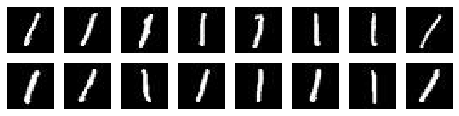

1/1 [==============================] - 1s 722ms/step
=[1]   [1.] 1/img_36495.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_23229.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [0.99999994] 1/img_31935.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_2549.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.99999696] 1/img_7556.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_23019.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999995] 1/img_28693.jpg
1/1 [==============================] - 0s 38ms/step
=[1]   [1.] 1/img_342.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_35081.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_1570.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_23463.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_5263.jpg
1/1 [=================

1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_33683.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.99999785] 1/img_2651.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.99999994] 1/img_12908.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.99999875] 1/img_24443.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_295.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.9999977] 1/img_6186.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999998] 1/img_28228.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_22011.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_13597.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_7827.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.99961805] 1/img_9294.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_13385.jpg


1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_39893.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [0.9999973] 1/img_21997.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_39985.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.99999887] 1/img_19050.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.9999998] 1/img_33165.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_13545.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999997] 1/img_39561.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_17735.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.99999934] 1/img_2895.jpg
1/1 [==============================] - 0s 30ms/step
=[1]   [0.9999998] 1/img_31928.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_18178.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [0.83545953] 1/img

=[1]   [0.9999416] 1/img_35957.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [0.99986154] 1/img_22490.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_37157.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.999999] 1/img_2408.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_13188.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_26319.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999967] 1/img_23260.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.9999999] 1/img_5493.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_15855.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [0.99999994] 1/img_34462.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_34537.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [0.98834467] 1/img_22199.jpg
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 32ms/step
=[1]   [0.99998397] 1/img_1024.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_24803.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999175] 1/img_40012.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.99999803] 1/img_3580.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999993] 1/img_11326.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_11841.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_40384.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_41608.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999999] 1/img_31723.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_10957.jpg
1/1 [==============================] - 0s 38ms/step
=[1]   [1.] 1/img_19076.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_21643.jpg
1/1 [

1/1 [==============================] - 0s 37ms/step
=[1]   [0.9999991] 1/img_37659.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [0.99992216] 1/img_6479.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_34509.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.99999976] 1/img_17804.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_17175.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999995] 1/img_39514.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_11205.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_2204.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_4310.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.9998385] 1/img_23931.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.99963576] 1/img_30706.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.9999998] 1/img_3

1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_26523.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_38384.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_18290.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_37340.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.9999999] 1/img_1475.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_39198.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_25127.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.99999976] 1/img_22437.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_3495.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_10061.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999991] 1/img_15545.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.99999994] 1/img_14958.jpg
1/1 [=======

1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_8962.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_29559.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.9999834] 1/img_1908.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.99999976] 1/img_32275.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_10089.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_7260.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.99999714] 1/img_9314.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999997] 1/img_13564.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_13176.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_20093.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_27603.jpg
1/1 [==============================] - 0s 30ms/step
=[1]   [1.] 1/img_11747.jpg
1/1 [=========

1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_18008.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_19162.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.9984068] 1/img_26610.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_16842.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_4741.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_29027.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999998] 1/img_36849.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.9999983] 1/img_11239.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999991] 1/img_30673.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_39916.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.99999076] 1/img_8810.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_468.jpg
1/1 [===

1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_14836.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.9999997] 1/img_40413.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.99999833] 1/img_17079.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_14433.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_34837.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.99999994] 1/img_185.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999989] 1/img_35593.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_1791.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.99999875] 1/img_39143.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_9399.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_3294.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999998] 1/img_29671.jpg


1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_37866.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999976] 1/img_12645.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.77897316] 1/img_21553.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.99999946] 1/img_21346.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [0.99999976] 1/img_10114.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_38808.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_32226.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_16818.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.9999992] 1/img_16111.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_39421.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_4009.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   xxx =  8  from  997
[0.0

1/1 [==============================] - 0s 33ms/step
=[1]   [0.99999994] 1/img_16572.jpg
1/1 [==============================] - 0s 37ms/step
=[1]   [1.] 1/img_642.jpg
1/1 [==============================] - 0s 37ms/step
=[1]   [1.] 1/img_32142.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_28409.jpg
1/1 [==============================] - 0s 36ms/step
=[0]   xxx =  9  from  1088
[0.1522363] 1/img_27462.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_26060.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [0.99999917] 1/img_16544.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_26041.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_32307.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   xxx =  10  from  1093
[0.32294035] 1/img_6500.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_29480.jpg
1/1 [==============================] - 0s 32ms/st

1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999988] 1/img_1980.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_36377.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [0.99999934] 1/img_17529.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.9999998] 1/img_15020.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_37457.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_9106.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_11489.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_30021.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_2073.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_15.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999999] 1/img_41467.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_39310.jpg
1/1 [============

1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_34803.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_29264.jpg
1/1 [==============================] - 0s 37ms/step
=[1]   [0.9999999] 1/img_3684.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [0.9999997] 1/img_8584.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   xxx =  14  from  1285
[0.28361604] 1/img_34172.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_31341.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.9999998] 1/img_2106.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_11120.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_11160.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.99999994] 1/img_37646.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_39229.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 

1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_13450.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_8050.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_24679.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_4440.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_3332.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_28882.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_23063.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.99999976] 1/img_27843.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_25401.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.999981] 1/img_12272.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999918] 1/img_5808.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_4216.jpg
1/1 [===================

1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_4145.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.99999994] 1/img_38009.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_41046.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_38237.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.9999999] 1/img_18781.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_19339.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_12351.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_2082.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_3984.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_13409.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_18983.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_41960.jpg
1/1 [=======================

1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_33109.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_40765.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [0.99999815] 1/img_41939.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.9999999] 1/img_31401.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.9999997] 1/img_15017.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_23527.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [0.98451394] 1/img_41333.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999992] 1/img_124.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_23696.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_22893.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.99999976] 1/img_9955.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_35992.jp

1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_38046.jpg
1/1 [==============================] - 0s 38ms/step
=[1]   [1.] 1/img_40517.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_24792.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999998] 1/img_10485.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_7361.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_22577.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999997] 1/img_19814.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_6839.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [0.99999964] 1/img_37050.jpg
1/1 [==============================] - 0s 37ms/step
=[1]   [1.] 1/img_7794.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_39036.jpg
1/1 [==============================] - 0s 37ms/step
=[1]   [1.] 1/img_32270.jpg
1/1 [================

1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_7208.jpg
1/1 [==============================] - 0s 35ms/step
=[0]   xxx =  18  from  1776
[0.09388823] 1/img_28718.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_36474.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_21586.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999999] 1/img_37877.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_23091.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [0.9991063] 1/img_4202.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_19436.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_14293.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_38591.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_7985.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [0.99999934] 1/img_2

1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_25754.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_28620.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.9999986] 1/img_33055.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999999] 1/img_16846.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999997] 1/img_1964.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_19782.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999998] 1/img_975.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_41002.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999999] 1/img_18465.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_32655.jpg
1/1 [==============================] - 0s 37ms/step
=[1]   [0.99999946] 1/img_19284.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_648.jpg
1/

1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_3312.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.99999994] 1/img_24794.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_28317.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_3120.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.99999976] 1/img_20450.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999998] 1/img_24336.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_20754.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.9999998] 1/img_5724.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.99999934] 1/img_16594.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9939947] 1/img_29178.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.99996805] 1/img_26322.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_

1/1 [==============================] - 0s 37ms/step
=[1]   [1.] 1/img_28368.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_18593.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_37196.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999999] 1/img_20472.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_26471.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999997] 1/img_38169.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.99999994] 1/img_2836.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_34319.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.99733084] 1/img_23160.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999999] 1/img_21567.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999999] 1/img_5771.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_2592.jpg

1/1 [==============================] - 0s 41ms/step
=[1]   [1.] 1/img_21919.jpg
1/1 [==============================] - 0s 38ms/step
=[1]   [0.9999974] 1/img_19227.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_33497.jpg
1/1 [==============================] - 0s 37ms/step
=[1]   [0.9999999] 1/img_14080.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_6157.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_4360.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_20349.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_10853.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_118.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_14939.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_28544.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_2482.jpg
1/1 [==========================

1/1 [==============================] - 0s 37ms/step
=[1]   [1.] 1/img_19167.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_23800.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9986648] 1/img_13914.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.9999973] 1/img_23086.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.99999774] 1/img_2410.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.99999994] 1/img_16233.jpg
1/1 [==============================] - 0s 30ms/step
=[1]   [0.99999815] 1/img_19332.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.99999964] 1/img_11442.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.99999946] 1/img_22349.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_29273.jpg
1/1 [==============================] - 0s 38ms/step
=[1]   [1.] 1/img_9508.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/im

1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_7906.jpg
1/1 [==============================] - 0s 40ms/step
=[1]   [0.99999934] 1/img_8726.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_25663.jpg
1/1 [==============================] - 0s 37ms/step
=[1]   [1.] 1/img_6538.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [0.99999976] 1/img_14093.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_25480.jpg
1/1 [==============================] - 0s 38ms/step
=[1]   [0.99999994] 1/img_34229.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_37351.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.99999994] 1/img_15091.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_9917.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [0.9999975] 1/img_3897.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_39120.jpg
1/1 [=

1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_38278.jpg
1/1 [==============================] - 0s 38ms/step
=[1]   [0.99999934] 1/img_31003.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999998] 1/img_17641.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.9999999] 1/img_40693.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.99999994] 1/img_23762.jpg
1/1 [==============================] - 0s 41ms/step
=[1]   [0.9999999] 1/img_14905.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [0.99999505] 1/img_36567.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_7463.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.99999994] 1/img_15839.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_7158.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [0.99999875] 1/img_17567.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1

=[1]   [1.] 1/img_14783.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.99348485] 1/img_20605.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   xxx =  26  from  2565
[0.04706901] 1/img_27122.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_26600.jpg
1/1 [==============================] - 0s 37ms/step
=[1]   [1.] 1/img_8745.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_20485.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.98650515] 1/img_9210.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_38433.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_11343.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [0.99997026] 1/img_36564.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_15887.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_39819.jpg
1/1 [==============================] - 0

1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_29533.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_10281.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.99999994] 1/img_2108.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999464] 1/img_35338.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_33818.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_6966.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999999] 1/img_29367.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_8437.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.99999994] 1/img_24414.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.99999946] 1/img_2719.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_8404.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.9999998] 1/img_7563.jpg
1

1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999998] 1/img_3553.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_4883.jpg
1/1 [==============================] - 0s 37ms/step
=[1]   [0.997833] 1/img_14367.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [0.9999997] 1/img_16841.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_5371.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_20332.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_4367.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_31129.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_5565.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_24186.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9998949] 1/img_41106.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999999] 1/img_24914.jpg
1/1 [======

1/1 [==============================] - 0s 39ms/step
=[1]   [0.9999999] 1/img_12583.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_522.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_27174.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [0.99999756] 1/img_18609.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.99460953] 1/img_6358.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_39708.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_29369.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_26236.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.99999917] 1/img_1378.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [0.99999994] 1/img_10684.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.9999994] 1/img_9606.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999979] 1/img_67

1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_23023.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_24782.jpg
1/1 [==============================] - 0s 37ms/step
=[1]   [1.] 1/img_2786.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_20394.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_23670.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [0.99994504] 1/img_13226.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_40535.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999975] 1/img_5873.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_30680.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [0.9999998] 1/img_6868.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_38172.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_11355.jpg
1/1 [================

1/1 [==============================] - 0s 32ms/step
=[1]   [0.99999976] 1/img_28969.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.99999994] 1/img_39786.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.99999994] 1/img_15811.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_40849.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_32291.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.6212297] 1/img_25676.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.99999994] 1/img_25033.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_31693.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_41812.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999995] 1/img_17762.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_17768.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_0.jp

1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_25494.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_27300.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_13933.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [0.9999997] 1/img_26507.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_40793.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_9983.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_28065.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999905] 1/img_25159.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_9404.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.99999946] 1/img_41954.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.9999802] 1/img_37708.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_27619.jpg
1/1 [========

1/1 [==============================] - 0s 35ms/step
=[1]   [0.9999996] 1/img_6181.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_22898.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999933] 1/img_2313.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999986] 1/img_24479.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_11551.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999999] 1/img_32661.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999884] 1/img_29620.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [0.9999846] 1/img_16719.jpg
1/1 [==============================] - 0s 37ms/step
=[1]   [1.] 1/img_37526.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_6835.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.9999932] 1/img_6062.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.99996376] 1/i

=[1]   [1.] 1/img_15734.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_23193.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_23058.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_23606.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_7811.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.99998385] 1/img_3447.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.99999994] 1/img_26526.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999974] 1/img_32313.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.9999999] 1/img_9609.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999999] 1/img_33280.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_10613.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999999] 1/img_14660.jpg
1/1 [==============================] - 0s 33ms/step

1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_12653.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_3982.jpg
1/1 [==============================] - 0s 42ms/step
=[1]   [1.] 1/img_20487.jpg
1/1 [==============================] - 0s 39ms/step
=[1]   [1.] 1/img_8911.jpg
1/1 [==============================] - 0s 37ms/step
=[1]   [1.] 1/img_31762.jpg
1/1 [==============================] - 0s 38ms/step
=[1]   [1.] 1/img_4709.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999997] 1/img_39341.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_28230.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_8559.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.99999994] 1/img_31456.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_29547.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_8179.jpg
1/1 [=========================

1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_33261.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_41880.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [0.9999998] 1/img_6365.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_35608.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_37959.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_14767.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [0.9999991] 1/img_3845.jpg
1/1 [==============================] - 0s 37ms/step
=[1]   [1.] 1/img_37638.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_11839.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_31486.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_32421.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_31814.jpg
1/1 [=======================

=[1]   [0.9999997] 1/img_2099.jpg
1/1 [==============================] - 0s 38ms/step
=[1]   [1.] 1/img_18758.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_5171.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.99999976] 1/img_16145.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_9030.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.99999917] 1/img_24571.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.99999994] 1/img_17947.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_748.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.99999565] 1/img_23691.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999999] 1/img_34375.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_8384.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_15032.jpg
1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 37ms/step
=[1]   [1.] 1/img_34072.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.9999949] 1/img_38089.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_14893.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.99999994] 1/img_41325.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.99216974] 1/img_25856.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.99999994] 1/img_14449.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999997] 1/img_34440.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_14748.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.99999994] 1/img_11979.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.99999976] 1/img_23357.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [0.99999976] 1/img_26636.jpg
1/1 [==============================] - 0s 35ms/step
=[1]  

1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999638] 1/img_724.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.99999046] 1/img_27170.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999965] 1/img_4856.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.999999] 1/img_18911.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_26933.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.99999994] 1/img_12697.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_29502.jpg
1/1 [==============================] - 0s 37ms/step
=[1]   [1.] 1/img_24579.jpg
1/1 [==============================] - 0s 37ms/step
=[1]   [1.] 1/img_6421.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999994] 1/img_37637.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_19048.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_27090.jpg
1

1/1 [==============================] - 0s 35ms/step
=[1]   [0.9999994] 1/img_14612.jpg
1/1 [==============================] - 0s 37ms/step
=[1]   [1.] 1/img_40989.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [0.99999994] 1/img_6138.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_39170.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_14126.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_38306.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.9999999] 1/img_28542.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_26176.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [0.99999636] 1/img_11280.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_3421.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [0.9999999] 1/img_22439.jpg
1/1 [==============================] - 0s 42ms/step
=[1]   [0.9999977] 1/img_31193.jp

1/1 [==============================] - 0s 33ms/step
=[1]   [0.9997443] 1/img_1106.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.99999946] 1/img_34732.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_32323.jpg
1/1 [==============================] - 0s 37ms/step
=[1]   [1.] 1/img_20602.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [0.99999964] 1/img_11011.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [0.99999946] 1/img_6745.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [0.9999973] 1/img_30054.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_26567.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999997] 1/img_37030.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.99999994] 1/img_41008.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.9999998] 1/img_33408.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [0.

1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_33081.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_14878.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_19931.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_22064.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.9999991] 1/img_9782.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_10192.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.99999917] 1/img_33772.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_12566.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_24613.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.9998372] 1/img_39350.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_17603.jpg
1/1 [==============================] - 0s 37ms/step
=[1]   [1.] 1/img_10252.jpg
1/1 [==============

1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_26054.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.99999976] 1/img_19678.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [0.99875164] 1/img_18989.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.99999994] 1/img_6454.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999987] 1/img_33693.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [0.99999225] 1/img_38542.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.99997497] 1/img_26956.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_31197.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_27721.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.99999934] 1/img_224.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_25368.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.999997

1/1 [==============================] - 0s 34ms/step
=[1]   [0.99999887] 1/img_19106.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9987071] 1/img_2517.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_41175.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_41076.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [0.9999999] 1/img_22817.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [0.99999994] 1/img_35900.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_34159.jpg
1/1 [==============================] - 0s 37ms/step
=[1]   [1.] 1/img_37409.jpg
1/1 [==============================] - 0s 38ms/step
=[1]   [0.9999997] 1/img_28849.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_10171.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_9187.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.99999994] 1/img_14409.j

1/1 [==============================] - 0s 35ms/step
=[1]   [0.99999994] 1/img_20079.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_21644.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_37965.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_21253.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_6305.jpg
1/1 [==============================] - 0s 39ms/step
=[1]   [0.9999557] 1/img_27784.jpg
1/1 [==============================] - 0s 38ms/step
=[1]   [1.] 1/img_7492.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.99999994] 1/img_36643.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.99992937] 1/img_25160.jpg
1/1 [==============================] - 0s 42ms/step
=[1]   [0.9999996] 1/img_9504.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_7119.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.9999995] 1/img_3932.jpg


1/1 [==============================] - 0s 42ms/step
=[1]   [1.] 1/img_38178.jpg
1/1 [==============================] - 0s 40ms/step
=[1]   [1.] 1/img_41729.jpg
1/1 [==============================] - 0s 42ms/step
=[1]   [1.] 1/img_10189.jpg
1/1 [==============================] - 0s 37ms/step
=[1]   [1.] 1/img_1398.jpg
1/1 [==============================] - 0s 37ms/step
=[1]   [1.] 1/img_2810.jpg
1/1 [==============================] - 0s 39ms/step
=[1]   [1.] 1/img_2173.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_17622.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [0.9999999] 1/img_39424.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_5793.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_1145.jpg
1/1 [==============================] - 0s 37ms/step
=[1]   [0.99999994] 1/img_24618.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_4110.jpg
1/1 [==========================

1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_28608.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [0.9999993] 1/img_8956.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_14016.jpg
1/1 [==============================] - 0s 38ms/step
=[1]   [1.] 1/img_38166.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [0.99999994] 1/img_36965.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_1486.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.99999964] 1/img_25028.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_8026.jpg
1/1 [==============================] - 0s 38ms/step
=[1]   [1.] 1/img_13106.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_40172.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [0.9949968] 1/img_20624.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_2431.jpg
1/1 [=========

In [11]:
#
# Evaluate test images with ONEs
#
common(train_one_dir,"ml101/")

In [28]:
#
# Images from training set misclasified
#
print(len(x_images))
for q in x_images:
    print(q)

17
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_23538.jpg']
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_7242.jpg']
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_11811.jpg']
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_25863.jpg']
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_31620.jpg']
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_23036.jpg']
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_19015.jpg']
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_23039.jpg']
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_26221.jpg']
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_19979.jpg']
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_8631.jpg']
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_4950.jpg']
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_12257.jpg']
['/home/watson/gittemp/ml

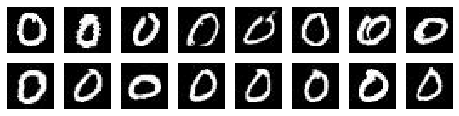

1/1 [==============================] - 0s 30ms/step
=[0]   [2.1831724e-11] 0/img_28894.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [8.488704e-08] 0/img_18260.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [2.9755376e-09] 0/img_14179.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.2805306e-07] 0/img_129.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [4.1659984e-08] 0/img_1729.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [3.4187075e-09] 0/img_38201.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [2.8775886e-09] 0/img_403.jpg
1/1 [==============================] - 0s 37ms/step
=[0]   [6.3943945e-10] 0/img_1544.jpg
1/1 [==============================] - 0s 37ms/step
=[0]   [3.0362696e-12] 0/img_35946.jpg
1/1 [==============================] - 0s 38ms/step
=[0]   [6.2941624e-11] 0/img_18729.jpg
1/1 [==============================] - 0s 35ms/step
=[0]   [2.7282773e-10] 0/img_38113.jpg
1/1 [=

1/1 [==============================] - 0s 36ms/step
=[0]   [1.0217297e-09] 0/img_27563.jpg
1/1 [==============================] - 0s 37ms/step
=[0]   [2.6957206e-10] 0/img_24102.jpg
1/1 [==============================] - 0s 36ms/step
=[0]   [8.6696866e-10] 0/img_24650.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [1.3515483e-06] 0/img_7199.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [3.5727766e-07] 0/img_8356.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.9853107e-06] 0/img_40553.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [7.92602e-10] 0/img_3697.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [9.9753934e-11] 0/img_4987.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [4.5102695e-08] 0/img_1881.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [3.3170452e-10] 0/img_18338.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [1.2806198e-09] 0/img_27736.jpg
1/1 [=

1/1 [==============================] - 0s 34ms/step
=[0]   [4.2533255e-10] 0/img_9769.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [5.1476977e-08] 0/img_32571.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.0106085e-09] 0/img_14963.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.6784992e-12] 0/img_17391.jpg
1/1 [==============================] - 0s 35ms/step
=[0]   [4.578383e-07] 0/img_676.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [2.0250999e-09] 0/img_18635.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [4.0026494e-05] 0/img_40022.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [2.3483194e-06] 0/img_7238.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [2.8173392e-12] 0/img_20128.jpg
1/1 [==============================] - 0s 35ms/step
=[0]   [2.9153653e-09] 0/img_24475.jpg
1/1 [==============================] - 0s 35ms/step
=[0]   [5.789602e-11] 0/img_17199.jpg
1/1 [

1/1 [==============================] - 0s 32ms/step
=[0]   [5.1923205e-11] 0/img_20126.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [0.00037013] 0/img_35300.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [3.2285774e-10] 0/img_11608.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [9.682158e-11] 0/img_39963.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [4.0909782e-09] 0/img_8340.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [6.521507e-10] 0/img_18625.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.10776575e-10] 0/img_26105.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [7.810643e-10] 0/img_32473.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [6.9617365e-09] 0/img_14734.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [2.4637403e-10] 0/img_7539.jpg
1/1 [==============================] - 0s 35ms/step
=[0]   [1.7962446e-13] 0/img_31343.jpg
1/1 [=

1/1 [==============================] - 0s 31ms/step
=[0]   [4.2697775e-07] 0/img_41468.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [8.919524e-10] 0/img_23190.jpg
1/1 [==============================] - 0s 35ms/step
=[0]   [9.2579135e-08] 0/img_13232.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [4.345058e-09] 0/img_24461.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [5.857918e-10] 0/img_9464.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [2.4538087e-09] 0/img_41170.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.5947789e-09] 0/img_39251.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.8310116e-10] 0/img_40112.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [9.4472887e-07] 0/img_11987.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.1071231e-11] 0/img_28501.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [8.0282626e-07] 0/img_11471.jpg
1/1

1/1 [==============================] - 0s 32ms/step
=[0]   [6.269256e-10] 0/img_19629.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [1.2355916e-07] 0/img_4783.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [2.3234165e-11] 0/img_33160.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [2.3824032e-07] 0/img_25088.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [3.4786264e-11] 0/img_12699.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [2.1685214e-12] 0/img_34629.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [4.0289613e-08] 0/img_11844.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [2.4164245e-07] 0/img_15816.jpg
1/1 [==============================] - 0s 35ms/step
=[0]   [2.2903027e-11] 0/img_36853.jpg
1/1 [==============================] - 0s 36ms/step
=[0]   [1.7548214e-10] 0/img_26108.jpg
1/1 [==============================] - 0s 35ms/step
=[0]   [6.421785e-10] 0/img_17.jpg
1/1 [

1/1 [==============================] - 0s 32ms/step
=[0]   [5.562923e-11] 0/img_29830.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [7.674418e-09] 0/img_33787.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [4.395597e-09] 0/img_19361.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [9.250448e-12] 0/img_22014.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [4.1591106e-10] 0/img_34700.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [4.5866383e-08] 0/img_7179.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [4.533338e-09] 0/img_33362.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [7.1774696e-12] 0/img_18961.jpg
1/1 [==============================] - 0s 35ms/step
=[0]   [7.533543e-11] 0/img_38096.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [1.2568227e-10] 0/img_33678.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [1.43623895e-08] 0/img_19396.jpg
1/1 [

1/1 [==============================] - 0s 34ms/step
=[0]   [6.527913e-11] 0/img_33975.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [5.4615912e-12] 0/img_20293.jpg
1/1 [==============================] - 0s 35ms/step
=[0]   [2.7989333e-10] 0/img_8071.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [4.3950835e-10] 0/img_41774.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [9.5944e-10] 0/img_31577.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [4.3189544e-10] 0/img_20152.jpg
1/1 [==============================] - 0s 36ms/step
=[0]   [0.00027978] 0/img_24429.jpg
1/1 [==============================] - 0s 36ms/step
=[0]   [6.9063144e-11] 0/img_40253.jpg
1/1 [==============================] - 0s 37ms/step
=[0]   [4.607414e-10] 0/img_32407.jpg
1/1 [==============================] - 0s 36ms/step
=[0]   [1.5005011e-06] 0/img_22308.jpg
1/1 [==============================] - 0s 36ms/step
=[0]   [6.187726e-10] 0/img_41402.jpg
1/1 [====

1/1 [==============================] - 0s 37ms/step
=[0]   [5.495977e-10] 0/img_13832.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [1.611467e-10] 0/img_30475.jpg
1/1 [==============================] - 0s 40ms/step
=[0]   [1.5784758e-10] 0/img_41069.jpg
1/1 [==============================] - 0s 35ms/step
=[0]   [2.2931081e-08] 0/img_10551.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [1.0896303e-07] 0/img_8460.jpg
1/1 [==============================] - 0s 39ms/step
=[0]   [7.0198414e-10] 0/img_18311.jpg
1/1 [==============================] - 0s 35ms/step
=[0]   [2.5045357e-09] 0/img_2038.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [1.3911593e-06] 0/img_37894.jpg
1/1 [==============================] - 0s 38ms/step
=[0]   [5.1317107e-11] 0/img_23746.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.6754304e-10] 0/img_5594.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [4.3840823e-10] 0/img_29858.jpg
1/1 

1/1 [==============================] - 0s 33ms/step
=[0]   [3.9905627e-11] 0/img_15061.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.5617108e-07] 0/img_6717.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.488704e-10] 0/img_27879.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [1.0848565e-11] 0/img_7843.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [2.3650362e-09] 0/img_9532.jpg
1/1 [==============================] - 0s 36ms/step
=[0]   [4.434925e-09] 0/img_20153.jpg
1/1 [==============================] - 0s 35ms/step
=[0]   [0.00083169] 0/img_16656.jpg
1/1 [==============================] - 0s 36ms/step
=[0]   [5.58333e-12] 0/img_4.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [2.1017421e-09] 0/img_17447.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [2.674899e-11] 0/img_21316.jpg
1/1 [==============================] - 0s 35ms/step
=[0]   [8.745742e-09] 0/img_34573.jpg
1/1 [==========

1/1 [==============================] - 0s 47ms/step
=[0]   [6.071766e-12] 0/img_33194.jpg
1/1 [==============================] - 0s 44ms/step
=[0]   [5.8468225e-10] 0/img_39546.jpg
1/1 [==============================] - 0s 41ms/step
=[0]   [5.7715024e-05] 0/img_40900.jpg
1/1 [==============================] - 0s 46ms/step
=[0]   [4.7164304e-11] 0/img_13051.jpg
1/1 [==============================] - 0s 43ms/step
=[0]   [1.3432619e-08] 0/img_40240.jpg
1/1 [==============================] - 0s 48ms/step
=[0]   [5.2456384e-10] 0/img_39521.jpg
1/1 [==============================] - 0s 41ms/step
=[0]   [2.0889143e-08] 0/img_24491.jpg
1/1 [==============================] - 0s 37ms/step
=[0]   [8.152479e-11] 0/img_32585.jpg
1/1 [==============================] - 0s 45ms/step
=[0]   [7.4200285e-11] 0/img_18344.jpg
1/1 [==============================] - 0s 53ms/step
=[0]   [3.2796686e-11] 0/img_9325.jpg
1/1 [==============================] - 0s 43ms/step
=[0]   [4.7033037e-08] 0/img_40857.jpg
1/

1/1 [==============================] - 0s 38ms/step
=[0]   [5.7696053e-11] 0/img_14197.jpg
1/1 [==============================] - 0s 39ms/step
=[0]   [2.4253213e-10] 0/img_23818.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [4.419978e-09] 0/img_2148.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [8.8493266e-08] 0/img_8481.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [1.186074e-11] 0/img_5577.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.2812679e-08] 0/img_18051.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.3253966e-11] 0/img_4729.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [7.738778e-11] 0/img_19655.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [5.036958e-11] 0/img_32016.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [1.9005729e-10] 0/img_20067.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [3.756458e-12] 0/img_21648.jpg
1/1 [===

1/1 [==============================] - 0s 33ms/step
=[0]   [2.2610123e-12] 0/img_36705.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [1.0330156e-11] 0/img_29565.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [2.5355305e-11] 0/img_23725.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.5450494e-09] 0/img_23.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [6.376226e-09] 0/img_2601.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [2.1014072e-11] 0/img_33228.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [2.3894925e-10] 0/img_18458.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [1.4283759e-09] 0/img_23953.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [7.9071905e-10] 0/img_16843.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.10687445e-10] 0/img_6528.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [1.5404376e-10] 0/img_17460.jpg
1/1 

=[0]   [5.9752214e-10] 0/img_34578.jpg
1/1 [==============================] - 0s 30ms/step
=[1]   xxx =  1  from  1182
[0.55265933] 0/img_6543.jpg
1/1 [==============================] - 0s 29ms/step
=[0]   [9.772251e-11] 0/img_36642.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [4.4717447e-07] 0/img_8200.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [7.051024e-11] 0/img_3377.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [2.1633862e-12] 0/img_23375.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [5.134888e-09] 0/img_38731.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.5530801e-09] 0/img_7459.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [7.6004646e-08] 0/img_18077.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.5429585e-09] 0/img_6302.jpg
1/1 [==============================] - 0s 29ms/step
=[0]   [2.2085889e-09] 0/img_23114.jpg
1/1 [==============================] - 0s

1/1 [==============================] - 0s 31ms/step
=[0]   [4.8384967e-09] 0/img_13837.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [3.004265e-11] 0/img_36516.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [5.975925e-11] 0/img_3934.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [2.494499e-10] 0/img_23001.jpg
1/1 [==============================] - 0s 28ms/step
=[0]   [5.215187e-07] 0/img_4848.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [9.517939e-10] 0/img_10992.jpg
1/1 [==============================] - 0s 29ms/step
=[0]   [4.871735e-07] 0/img_3271.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.0916763e-09] 0/img_29416.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [8.4360414e-11] 0/img_25870.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [5.3626374e-09] 0/img_7530.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [7.5946466e-10] 0/img_31402.jpg
1/1 [====

1/1 [==============================] - 0s 30ms/step
=[0]   [4.1988048e-07] 0/img_28380.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.0335717e-05] 0/img_1477.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.5828723e-09] 0/img_20889.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [5.342067e-09] 0/img_15659.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [8.926668e-11] 0/img_21243.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [1.5582244e-10] 0/img_1650.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [2.7789996e-11] 0/img_19335.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [8.263199e-09] 0/img_40436.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.2432095e-09] 0/img_21090.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [4.989731e-11] 0/img_18280.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [5.678783e-10] 0/img_41771.jpg
1/1 [=

1/1 [==============================] - 0s 30ms/step
=[0]   [1.0437845e-10] 0/img_3237.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [0.00053991] 0/img_6176.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.5128936e-08] 0/img_6369.jpg
1/1 [==============================] - 0s 35ms/step
=[0]   [1.7638365e-08] 0/img_279.jpg
1/1 [==============================] - 0s 35ms/step
=[0]   [6.018308e-10] 0/img_36531.jpg
1/1 [==============================] - 0s 29ms/step
=[0]   [1.3236251e-08] 0/img_30511.jpg
1/1 [==============================] - 0s 29ms/step
=[0]   [6.0607575e-10] 0/img_39420.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [3.0621374e-09] 0/img_12782.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [6.217782e-08] 0/img_32133.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [2.3711869e-10] 0/img_37226.jpg
1/1 [==============================] - 0s 29ms/step
=[0]   [2.7985394e-13] 0/img_29946.jpg
1/1 [====

1/1 [==============================] - 0s 34ms/step
=[0]   [7.819009e-09] 0/img_24060.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [3.8275093e-08] 0/img_28121.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [6.3259185e-09] 0/img_25645.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [1.1525012e-05] 0/img_41639.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [2.0588344e-10] 0/img_819.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [5.840921e-08] 0/img_24040.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [8.9647593e-13] 0/img_39533.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [6.4651556e-10] 0/img_4761.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.5192806e-09] 0/img_39652.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [4.0014965e-09] 0/img_35965.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [1.4768632e-07] 0/img_603.jpg
1/1 [=

1/1 [==============================] - 0s 33ms/step
=[0]   [2.5178668e-08] 0/img_24513.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [1.3003636e-11] 0/img_40156.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [1.5794854e-09] 0/img_15235.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [5.1718235e-10] 0/img_41041.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [2.4080478e-08] 0/img_13775.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [1.8160012e-09] 0/img_13591.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.2969863e-09] 0/img_27425.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [5.8678705e-07] 0/img_19813.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [3.1322268e-06] 0/img_23327.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [2.79101e-11] 0/img_17337.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [3.6239138e-07] 0/img_35029.jpg
1

1/1 [==============================] - 0s 31ms/step
=[0]   [9.669138e-09] 0/img_6281.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [2.4332472e-08] 0/img_14324.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [9.365815e-11] 0/img_31555.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.0309425e-08] 0/img_25548.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [3.993852e-11] 0/img_9167.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [2.0594627e-10] 0/img_38787.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.7309963e-10] 0/img_2777.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [3.8190828e-10] 0/img_29544.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [2.2469577e-09] 0/img_17369.jpg
1/1 [==============================] - 0s 37ms/step
=[0]   [1.3163803e-10] 0/img_24689.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [4.916023e-09] 0/img_32896.jpg
1/1 [=

1/1 [==============================] - 0s 30ms/step
=[0]   [4.630816e-09] 0/img_33388.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [3.973341e-09] 0/img_24093.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [3.316903e-08] 0/img_39023.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [2.3492244e-06] 0/img_4508.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [5.9818206e-11] 0/img_24714.jpg
1/1 [==============================] - 0s 36ms/step
=[0]   [4.1546636e-07] 0/img_22262.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [2.9488305e-09] 0/img_12744.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [2.7946938e-09] 0/img_37264.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [2.8155264e-10] 0/img_34973.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [3.319767e-10] 0/img_12017.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [9.480705e-10] 0/img_31319.jpg
1/1 [

1/1 [==============================] - 0s 32ms/step
=[0]   [1.0855298e-10] 0/img_19202.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [6.2855156e-07] 0/img_18523.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [2.435766e-10] 0/img_35496.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [6.17683e-10] 0/img_38152.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.7897894e-06] 0/img_39542.jpg
1/1 [==============================] - 0s 29ms/step
=[0]   [2.4982605e-10] 0/img_12861.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [7.992136e-09] 0/img_28055.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [5.6844013e-12] 0/img_22117.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [4.2748107e-11] 0/img_37993.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [6.8083e-11] 0/img_54.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [3.9344354e-09] 0/img_1581.jpg
1/1 [=====

1/1 [==============================] - 0s 33ms/step
=[0]   [1.1656257e-10] 0/img_36918.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [5.885306e-08] 0/img_3067.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.3835306e-06] 0/img_11505.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [1.4599624e-06] 0/img_26765.jpg
1/1 [==============================] - 0s 35ms/step
=[0]   [2.6650995e-12] 0/img_3702.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [5.377428e-09] 0/img_20037.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [7.887387e-09] 0/img_30882.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [4.5918527e-09] 0/img_7380.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [5.3236158e-09] 0/img_9895.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [8.219917e-07] 0/img_39051.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [1.3016982e-08] 0/img_3195.jpg
1/1 [===

1/1 [==============================] - 0s 33ms/step
=[0]   [3.2254743e-06] 0/img_5636.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [9.765972e-11] 0/img_18451.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [2.120772e-10] 0/img_26581.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.2136702e-08] 0/img_37876.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.0504191e-10] 0/img_20374.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [4.729179e-10] 0/img_33961.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [1.7018176e-05] 0/img_14870.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [7.958692e-11] 0/img_11548.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [1.4393528e-10] 0/img_9787.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [5.7289387e-09] 0/img_30523.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [2.2291857e-10] 0/img_41537.jpg
1/1 [

1/1 [==============================] - 0s 31ms/step
=[0]   [2.1099993e-10] 0/img_16649.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [1.0920735e-10] 0/img_14042.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [2.5414705e-08] 0/img_41121.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [2.1339692e-06] 0/img_29990.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [3.0765374e-10] 0/img_4527.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [2.8382585e-10] 0/img_13713.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.3375702e-09] 0/img_34018.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [5.9842806e-09] 0/img_32122.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [3.0762572e-09] 0/img_15630.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [1.2383842e-05] 0/img_4725.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [1.0627611e-09] 0/img_31047.jpg
1

1/1 [==============================] - 0s 32ms/step
=[0]   [1.0752851e-08] 0/img_2535.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [2.2512143e-08] 0/img_20572.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [1.9828821e-11] 0/img_22243.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [9.619179e-07] 0/img_3460.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [3.7190355e-09] 0/img_25942.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [1.1019711e-09] 0/img_30101.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [4.5383493e-12] 0/img_7402.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [1.43162825e-11] 0/img_23757.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [8.21195e-12] 0/img_39403.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [7.2803545e-08] 0/img_40261.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [1.2793179e-10] 0/img_19614.jpg
1/1 

=[0]   [3.9271475e-13] 0/img_2519.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [2.934158e-10] 0/img_4432.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [5.2738915e-09] 0/img_11535.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.4749664e-12] 0/img_26683.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [7.365998e-10] 0/img_19287.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [2.765702e-10] 0/img_31835.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [4.739401e-10] 0/img_33600.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [4.0970008e-08] 0/img_4041.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [9.7287655e-12] 0/img_32635.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [0.00049727] 0/img_39334.jpg
1/1 [==============================] - 0s 29ms/step
=[0]   [1.8193674e-13] 0/img_31694.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [6

1/1 [==============================] - 0s 29ms/step
=[0]   [1.0041008e-09] 0/img_21091.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [4.8054054e-09] 0/img_34976.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [7.806856e-11] 0/img_16020.jpg
1/1 [==============================] - 0s 29ms/step
=[0]   [2.3601489e-11] 0/img_38750.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [1.1607526e-08] 0/img_32980.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [2.2030648e-09] 0/img_28533.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [6.302302e-09] 0/img_36842.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [3.325967e-09] 0/img_31395.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [8.297593e-10] 0/img_1260.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [3.678767e-08] 0/img_26478.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [2.9154208e-09] 0/img_35655.jpg
1/1 [

=[0]   [1.1812792e-10] 0/img_30127.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [6.690029e-10] 0/img_11580.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [4.4433666e-09] 0/img_5738.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.0523227e-09] 0/img_5705.jpg
1/1 [==============================] - 0s 36ms/step
=[0]   [3.851019e-10] 0/img_34958.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [3.5341904e-10] 0/img_8066.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [2.742841e-09] 0/img_40854.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [5.696939e-06] 0/img_20025.jpg
1/1 [==============================] - 0s 29ms/step
=[0]   [1.2263142e-09] 0/img_34066.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.8903622e-11] 0/img_11727.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [1.3574986e-10] 0/img_8249.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   

1/1 [==============================] - 0s 31ms/step
=[0]   [9.123397e-11] 0/img_9624.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [6.674336e-11] 0/img_6936.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.4747478e-11] 0/img_31442.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [2.8700915e-08] 0/img_39389.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [5.8086e-09] 0/img_5805.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.992293e-07] 0/img_23070.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.650966e-10] 0/img_29050.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [9.247022e-09] 0/img_24807.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [5.5436034e-11] 0/img_5510.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [7.591036e-11] 0/img_12729.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [2.0770717e-11] 0/img_30262.jpg
1/1 [=======

1/1 [==============================] - 0s 32ms/step
=[0]   [1.7408185e-08] 0/img_26560.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [4.5342875e-07] 0/img_15024.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [5.7167e-10] 0/img_9130.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [5.474028e-10] 0/img_13077.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.5442039e-06] 0/img_30177.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [6.403832e-09] 0/img_4175.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.0596051e-10] 0/img_37971.jpg
1/1 [==============================] - 0s 29ms/step
=[0]   [1.7851422e-08] 0/img_8338.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [4.4146525e-13] 0/img_27665.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [1.2761904e-11] 0/img_39361.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [6.084629e-10] 0/img_28342.jpg
1/1 [===

1/1 [==============================] - 0s 29ms/step
=[0]   [1.13773824e-10] 0/img_34955.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [2.6287827e-10] 0/img_36634.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [7.995684e-10] 0/img_11200.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [1.5518926e-07] 0/img_5850.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [2.501193e-10] 0/img_7256.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [6.896916e-11] 0/img_39528.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.16033086e-10] 0/img_2382.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [2.3512267e-10] 0/img_27945.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [6.846712e-08] 0/img_17055.jpg
1/1 [==============================] - 0s 29ms/step
=[0]   [4.1883323e-11] 0/img_21110.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [2.6238574e-11] 0/img_2684.jpg
1/1 [

1/1 [==============================] - 0s 33ms/step
=[0]   [1.5317427e-09] 0/img_12074.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [7.7943474e-10] 0/img_29583.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [0.00098445] 0/img_22698.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [2.7382085e-10] 0/img_29397.jpg
1/1 [==============================] - 0s 36ms/step
=[0]   [5.7110267e-12] 0/img_26742.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [4.483274e-07] 0/img_24375.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [2.4258118e-10] 0/img_3419.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [2.4816677e-07] 0/img_32853.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.4637592e-08] 0/img_30585.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.4694726e-10] 0/img_6079.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [7.3102774e-07] 0/img_3253.jpg
1/1 [=

=[0]   [4.721658e-08] 0/img_1135.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [6.432229e-10] 0/img_28940.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [7.509037e-12] 0/img_18630.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.6059338e-11] 0/img_37188.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [7.9419854e-10] 0/img_40903.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.3733727e-07] 0/img_34872.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [4.757624e-10] 0/img_18546.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [5.794593e-07] 0/img_36347.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [3.367004e-08] 0/img_2253.jpg
1/1 [==============================] - 0s 29ms/step
=[0]   [0.00025134] 0/img_7175.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [6.791763e-11] 0/img_11441.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [3.13

1/1 [==============================] - 0s 33ms/step
=[0]   [5.383449e-10] 0/img_7140.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.202423e-07] 0/img_4983.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [6.074581e-08] 0/img_3821.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [2.2824052e-11] 0/img_4103.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [4.1439152e-10] 0/img_36587.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [9.424192e-08] 0/img_3868.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [3.7182268e-09] 0/img_29362.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.1774508e-10] 0/img_7252.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.9000319e-11] 0/img_9545.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [8.009343e-07] 0/img_29339.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [7.4556694e-10] 0/img_1436.jpg
1/1 [=======

1/1 [==============================] - 0s 30ms/step
=[0]   [8.919349e-11] 0/img_5054.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [3.0716972e-08] 0/img_24321.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [4.7287303e-09] 0/img_40823.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [1.8170397e-10] 0/img_26234.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [3.7833663e-11] 0/img_5507.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [8.651834e-09] 0/img_34897.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [1.6743897e-09] 0/img_13800.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [2.0036153e-09] 0/img_4021.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [3.0880484e-10] 0/img_18840.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [5.959151e-10] 0/img_10990.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [0.00323489] 0/img_17616.jpg
1/1 [===

1/1 [==============================] - 0s 33ms/step
=[0]   [7.729223e-10] 0/img_2193.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [7.282358e-06] 0/img_25317.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [8.961593e-10] 0/img_23296.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [7.608696e-10] 0/img_39057.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [3.9729225e-10] 0/img_5459.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.1898427e-10] 0/img_7758.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [4.690645e-08] 0/img_12596.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [3.6418686e-09] 0/img_15069.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [2.7131075e-11] 0/img_6640.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [1.7713622e-11] 0/img_34415.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [2.3438194e-07] 0/img_39154.jpg
1/1 [===

1/1 [==============================] - 0s 33ms/step
=[0]   [3.634206e-10] 0/img_15849.jpg
1/1 [==============================] - 0s 35ms/step
=[0]   [2.2271562e-12] 0/img_1314.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [8.8853436e-10] 0/img_31752.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [2.5672685e-07] 0/img_36373.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [1.4925423e-10] 0/img_32976.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.9314784e-10] 0/img_11478.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.5684992e-06] 0/img_36357.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [1.1144329e-10] 0/img_29101.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [2.463832e-08] 0/img_27713.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [1.8415187e-10] 0/img_9650.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [5.9861095e-06] 0/img_17620.jpg
1/1

1/1 [==============================] - 0s 34ms/step
=[0]   [3.2993306e-08] 0/img_7092.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [9.2210384e-10] 0/img_3970.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [4.71112e-06] 0/img_11576.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [4.684862e-11] 0/img_344.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [6.824334e-10] 0/img_27312.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [3.0499941e-10] 0/img_7706.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [8.3653046e-10] 0/img_12208.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [2.8319704e-07] 0/img_20579.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [3.726292e-09] 0/img_30891.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [7.048122e-07] 0/img_5207.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [6.509868e-08] 0/img_8295.jpg
1/1 [========

1/1 [==============================] - 0s 29ms/step
=[0]   [9.036976e-11] 0/img_17352.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [7.042512e-08] 0/img_12589.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.1494016e-09] 0/img_24200.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [3.6147974e-08] 0/img_29735.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [3.7541272e-07] 0/img_21201.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [3.5691334e-09] 0/img_12917.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [2.6411462e-10] 0/img_25282.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [5.086614e-10] 0/img_7533.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [3.8638452e-09] 0/img_18832.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [9.81735e-11] 0/img_8986.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [2.4251714e-08] 0/img_8608.jpg
1/1 [==

1/1 [==============================] - 0s 31ms/step
=[0]   [2.7924143e-12] 0/img_9288.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [7.125344e-10] 0/img_23892.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [5.0404423e-09] 0/img_23261.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [1.2414726e-09] 0/img_12652.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [1.929608e-10] 0/img_2528.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [1.2843863e-10] 0/img_24489.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [2.312985e-08] 0/img_39690.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.1195231e-09] 0/img_8700.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [3.3233576e-11] 0/img_28945.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [8.752174e-11] 0/img_24419.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [4.006181e-11] 0/img_4168.jpg
1/1 [===

1/1 [==============================] - 0s 34ms/step
=[0]   [3.583217e-10] 0/img_22046.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.4719272e-10] 0/img_6719.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [9.646328e-10] 0/img_141.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.8316098e-09] 0/img_3613.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [8.997843e-08] 0/img_2851.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [4.681082e-07] 0/img_32082.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [6.302951e-09] 0/img_8708.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [5.4742156e-07] 0/img_8235.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.7611698e-09] 0/img_29630.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [3.431613e-11] 0/img_29883.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [6.798982e-11] 0/img_14418.jpg
1/1 [========

1/1 [==============================] - 0s 32ms/step
=[0]   [5.322354e-10] 0/img_14759.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [6.358004e-11] 0/img_31717.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [2.477042e-10] 0/img_18369.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.3539818e-10] 0/img_13562.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [3.4930056e-12] 0/img_8903.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [3.5634596e-07] 0/img_22170.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [6.708151e-09] 0/img_14535.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [1.7859372e-10] 0/img_433.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [2.7121025e-12] 0/img_22345.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [6.262701e-12] 0/img_35183.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [2.6380235e-11] 0/img_22208.jpg
1/1 [==

1/1 [==============================] - 0s 32ms/step
=[0]   [1.0715262e-08] 0/img_1911.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [7.405918e-11] 0/img_22158.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [3.13766e-07] 0/img_23370.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [2.083899e-09] 0/img_20064.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [6.5500044e-10] 0/img_16835.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [3.1950437e-10] 0/img_35884.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [3.2418682e-06] 0/img_33046.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [2.4489881e-09] 0/img_98.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [6.809469e-11] 0/img_976.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [5.3442477e-09] 0/img_24724.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [2.3938934e-11] 0/img_809.jpg
1/1 [=======

1/1 [==============================] - 0s 33ms/step
=[0]   [1.1154701e-07] 0/img_3023.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [6.1604437e-09] 0/img_153.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [1.7184759e-10] 0/img_28393.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [2.7850091e-09] 0/img_1353.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [5.10549e-10] 0/img_12149.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [6.539232e-10] 0/img_34646.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [6.7034533e-10] 0/img_30288.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [1.8473771e-09] 0/img_22821.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [6.9309984e-09] 0/img_38587.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [4.731615e-10] 0/img_18037.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [2.6519147e-09] 0/img_33815.jpg
1/1 [==

1/1 [==============================] - 0s 31ms/step
=[0]   [4.7801884e-11] 0/img_37575.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.8401634e-10] 0/img_39441.jpg
1/1 [==============================] - 0s 35ms/step
=[0]   [2.2965023e-10] 0/img_19921.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [2.7872768e-10] 0/img_35592.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.1218937e-09] 0/img_39123.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [1.0725571e-11] 0/img_11299.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [3.65546e-09] 0/img_12578.jpg
1/1 [==============================] - 0s 30ms/step
=[0]   [5.1103416e-10] 0/img_11121.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [1.1191581e-09] 0/img_25291.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [3.769972e-09] 0/img_13004.jpg
1/1 [==============================] - 0s 31ms/step
=[0]   [4.1834345e-09] 0/img_1770.jpg
1/1

In [13]:
#
# Evaluate test images with ZEROs
#
common(train_zero_dir,"ml101/",0)

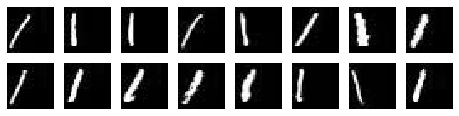

1/1 [==============================] - 0s 29ms/step
=[1]   [1.] img_342.jpg
1/1 [==============================] - 0s 30ms/step
=[1]   [1.] img_2.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.9999999] img_527.jpg
1/1 [==============================] - 0s 29ms/step
=[1]   [1.] img_255.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] img_295.jpg
1/1 [==============================] - 0s 29ms/step
=[1]   [1.] img_249.jpg
1/1 [==============================] - 0s 29ms/step
=[1]   [0.99993277] img_549.jpg
1/1 [==============================] - 0s 30ms/step
=[1]   [1.] img_152.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.99999994] img_468.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.99999994] img_68.jpg
1/1 [==============================] - 0s 30ms/step
=[1]   [1.] img_185.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9999998] img_134.jpg
1/1 [==============================] - 0s 35ms/step
=

In [14]:
#
# ONEs shifted to the left
#
common(path_base+'/sl1/',"sl1/")

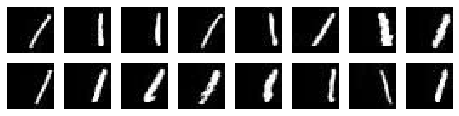

1/1 [==============================] - 0s 31ms/step
=[1]   [1.] img_342.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] img_2.jpg
1/1 [==============================] - 0s 30ms/step
=[1]   [1.] img_527.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] img_255.jpg
1/1 [==============================] - 0s 30ms/step
=[1]   [1.] img_295.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] img_249.jpg
1/1 [==============================] - 0s 30ms/step
=[1]   [1.] img_549.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9999999] img_152.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] img_468.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] img_68.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9998995] img_185.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [0.9999895] img_134.jpg
1/1 [==============================] - 0s 30ms/step
=[1]   [0.9999999]

In [15]:
#
# ONEs shifted to the right
#
common(path_base+'/sr1/',"sr1/")

1/1 [==============================] - 0s 32ms/step
[1.]


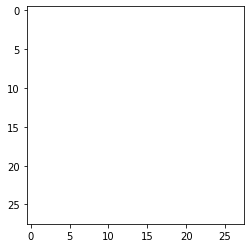

In [16]:
#
# A white image is 100% sure that is a ZERO
#
path = path_base+'/x/img_white.jpg'

img = mpimg.imread(path)
plt.imshow(img)

img = image.load_img(path, target_size=(150,150))#(28,28))
x = image.img_to_array(img)
x = x/255.0
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print(classes[0])

1/1 [==============================] - 0s 37ms/step
[1.]


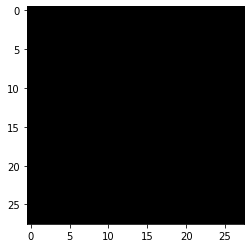

In [17]:
#
# A black image is a ONE
#
path = path_base+'/x/img_black.jpg'

img = mpimg.imread(path)
plt.imshow(img)

img = image.load_img(path, target_size=(150,150))#(28,28))
x = image.img_to_array(img)
x = x/255.0
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print(classes[0])

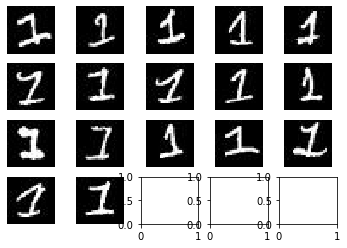

In [37]:
#
# Misclassified images 3 x 5 subplots
#

c=4
r=5
f, axarr = plt.subplots(c,r)
z = 0
for i in range(c):
    for j in range(r):
        #print(i)
        path = path_base+'/ml101/'+x_images[z][1]
        img = mpimg.imread(path)
        
        axarr[i,j].imshow(img, cmap='gray')
        axarr[i,j].axis('off')
        #plt.imshow(img, cmap='gray')
        z+=1
        if j==r-4 and i==c-1:
            j=r
            i=c
            break
    


In [20]:
#
# Misclassified images predictions
#

for i in x_images:
    path = path_base+'/ml101/'+i[1]
    print(path)
    img = image.load_img(path, target_size=(150,150,3))#(28,28))


    x = image.img_to_array(img)
    x = x/255.0
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=6)
    print(classes[0], path)

/home/watson/gittemp/ml-classifier-no-common-sense/ml101/1/img_23538.jpg
1/1 [==============================] - 0s 30ms/step
[0.00017068] /home/watson/gittemp/ml-classifier-no-common-sense/ml101/1/img_23538.jpg
/home/watson/gittemp/ml-classifier-no-common-sense/ml101/1/img_7242.jpg
1/1 [==============================] - 0s 29ms/step
[0.02863282] /home/watson/gittemp/ml-classifier-no-common-sense/ml101/1/img_7242.jpg
/home/watson/gittemp/ml-classifier-no-common-sense/ml101/1/img_11811.jpg
1/1 [==============================] - 0s 30ms/step
[0.01444039] /home/watson/gittemp/ml-classifier-no-common-sense/ml101/1/img_11811.jpg
/home/watson/gittemp/ml-classifier-no-common-sense/ml101/1/img_25863.jpg
1/1 [==============================] - 0s 31ms/step
[0.02959104] /home/watson/gittemp/ml-classifier-no-common-sense/ml101/1/img_25863.jpg
/home/watson/gittemp/ml-classifier-no-common-sense/ml101/1/img_622.jpg
1/1 [==============================] - 0s 29ms/step
[0.12910318] /home/watson/gittemp/m

1/1 [==============================] - 0s 34ms/step
[0.00804764] /home/watson/gittemp/ml-classifier-no-common-sense/ml101/1/img_37034.jpg
/home/watson/gittemp/ml-classifier-no-common-sense/ml101/1/img_20137.jpg
1/1 [==============================] - 0s 31ms/step
[0.24202661] /home/watson/gittemp/ml-classifier-no-common-sense/ml101/1/img_20137.jpg


1/1 [==============================] - 0s 30ms/step
[0.00073743]


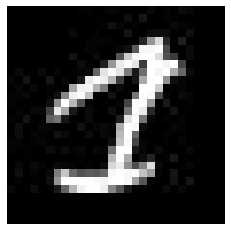

In [21]:
#
# misclassified images prediction
#
path = path_base+'/ml101/1/img_4789.jpg'

img = mpimg.imread(path)
plt.axis('off')
plt.imshow(img, cmap='gray')

img = image.load_img(path, target_size=(150,150))
x = image.img_to_array(img)
x = x/255.0
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print(classes[0])

1/1 [==============================] - 0s 31ms/step
[0.18462428]


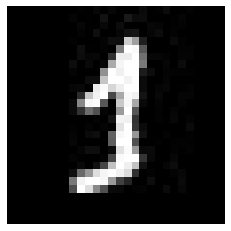

In [22]:
#
# isclassified images prediction
#
path = path_base+'/ml101/1/img_21125.jpg'

img = mpimg.imread(path)
plt.axis('off')
plt.imshow(img, cmap='gray')

img = image.load_img(path, target_size=(150,150))
x = image.img_to_array(img)
x = x/255.0
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print(classes[0])

In [23]:
'''
x_images = [['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_23538.jpg'],
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_7242.jpg'],
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_11811.jpg'],
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_25863.jpg'],
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_31620.jpg'],
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_23036.jpg'],
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_19015.jpg'],
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_23039.jpg'],
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_26221.jpg'],
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_19979.jpg'],
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_8631.jpg'],
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_4950.jpg'],
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_12257.jpg'],
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_35575.jpg'],
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_28669.jpg'],
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_4789.jpg'],
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_37034.jpg']]

print(len(x_images))
print(x_images[0])

for i in x_images:
    path = path_base+'/ml101/'+i[1]
    print(path)
    img = image.load_img(path, target_size=(150,150,3))#(28,28))


    x = image.img_to_array(img)
    x = x/255.0
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=6)
    print(classes[0], path)
    
    
#
# More challenging training images
#
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_18756.jpg']
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_21125.jpg']
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_23036.jpg']
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_23039.jpg']
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_24071.jpg']
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_4789.jpg']    

#
# Misclassified images one by one
#

for i in x_images:
    #print(i)
    path = path_base+'/ml101/'+i[1]
    img = mpimg.imread(path)
    plt.axis('off')
    plt.figure()
    plt.imshow(img, cmap='gray')
'''    

17
['/home/watson/gittemp/ml-classifier-no-common-sense/', '1/img_23538.jpg']
